In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

In [2]:
import zipfile # to handle zip file
from zipfile import ZipFile
tf.keras.utils.get_file('horse-or-human.zip', "https://storage.googleapis.com/learning-datasets/horse-or-human.zip")


'C:\\Users\\NUPUR SRIVASTAVA\\.keras\\datasets\\horse-or-human.zip'

In [3]:
import os
local_zip = 'C:\\Users\\NUPUR SRIVASTAVA\\.keras\\datasets\\horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('horse-or-human')
zip_ref.close()


In [4]:
os.listdir('horse-or-human')

['horses', 'humans']

In [5]:
os.listdir('horse-or-human/horses')

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png',
 'horse02-0.png',
 'horse02-1.png',
 'horse02-2.png',
 'horse02-3.png',
 'horse02-4.png',
 'horse02-5.png',
 'horse02-6.png',
 'horse02-7.png',
 'horse02-8.png',
 'horse02-9.png',
 'horse03-0.png',
 'horse03-1.png',
 'horse03-2.png',
 'horse03-3.png',
 'horse03-4.png',
 'horse03-5.png',
 'horse03-6.png',
 'horse03-7.png',
 'horse03-8.png',
 'horse03-9.png',
 'horse04-0.png',
 'horse04-1.png',
 'horse04-2.png',
 'horse04-3.png',
 'horse04-4.png',
 'horse04-5.png',
 'horse04-6.png',
 'horse04-7.png',
 'horse04-8.png',
 'horse04-9.png',
 'horse05-0.png',
 'horse05-1.png',
 'horse05-2.png',
 'horse05-3.png',
 'horse05-4.png',
 'horse05-5.png',
 'horse05-6.png',
 'horse05-7.png',
 'horse05-8.png',
 'horse05-9.png',
 'horse06-0.png',
 'horse06-1.png',
 'horse06-2.png',
 'horse06-3.png',
 'horse06-4.png',
 'horse06-

In [6]:
len(os.listdir('horse-or-human/horses'))

500

In [7]:
os.listdir('horse-or-human/humans/')

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png',
 'human01-05.png',
 'human01-06.png',
 'human01-07.png',
 'human01-08.png',
 'human01-09.png',
 'human01-10.png',
 'human01-11.png',
 'human01-12.png',
 'human01-13.png',
 'human01-14.png',
 'human01-15.png',
 'human01-16.png',
 'human01-17.png',
 'human01-18.png',
 'human01-19.png',
 'human01-20.png',
 'human01-21.png',
 'human01-22.png',
 'human01-23.png',
 'human01-24.png',
 'human01-25.png',
 'human01-26.png',
 'human01-27.png',
 'human01-28.png',
 'human01-29.png',
 'human01-30.png',
 'human02-00.png',
 'human02-01.png',
 'human02-02.png',
 'human02-03.png',
 'human02-04.png',
 'human02-05.png',
 'human02-06.png',
 'human02-07.png',
 'human02-08.png',
 'human02-09.png',
 'human02-10.png',
 'human02-11.png',
 'human02-12.png',
 'human02-13.png',
 'human02-14.png',
 'human02-15.png',
 'human02-16.png',
 'human02-17.png',
 'human02-18.png',
 'human02-19.png',
 'human02-20.png',
 'human02-21

In [8]:
len(os.listdir('horse-or-human/humans/'))

527

In [9]:
len(os.listdir('horse-or-human/horses'))+len(os.listdir('horse-or-human/humans/'))

1027

In [10]:
from keras.layers import Dense,Flatten
from  keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array,array_to_img
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

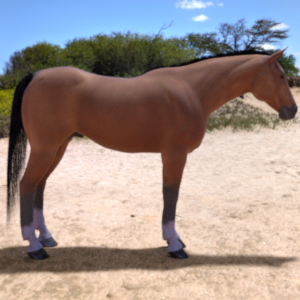

In [13]:
load_img('horse-or-human/horses/horse02-7.png')

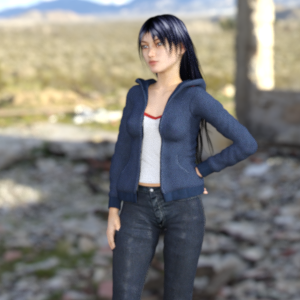

In [18]:
load_img('horse-or-human/humans/human03-14.png')

In [31]:
batch_size = 40
epochs = 50
IMG_HEIGHT = 224
IMG_WIDTH = 224


In [32]:
image_gen_train = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [33]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory = 'horse-or-human/',
                                                    shuffle = True,
                                                    target_size = (IMG_HEIGHT,IMG_WIDTH),
                                                    subset = 'training')

Found 822 images belonging to 2 classes.


In [34]:
train_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [35]:
image_gen_val = ImageDataGenerator(rescale = 1./255,
                                  validation_split=0.2)

In [36]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory = 'horse-or-human/',
                                                 target_size = (IMG_HEIGHT,IMG_WIDTH),
                                                 subset = 'validation'
                                                )

Found 205 images belonging to 2 classes.


In [30]:
val_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [38]:
sample_image, labels = next(train_data_gen)

In [40]:
sample_image.shape

(40, 224, 224, 3)

In [41]:
labels

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1.], dtype=float32)

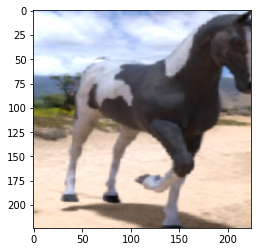

In [46]:
plt.imshow(sample_image[5])

In [49]:
from keras.layers import Conv2D,MaxPooling2D
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape = (IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
    
]
)

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [51]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [53]:
filepath = 'my_best_case_human_or_horse.h5'

In [54]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

In [55]:
callbacks = [checkpoint]

In [56]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs,callbacks=callbacks)

Epoch 1/50
21/21 [==============================] - 39s 2s/step - loss: 1.3639 - accuracy: 0.5158 - val_loss: 0.6478 - val_accuracy: 0.8293

Epoch 00001: val_loss improved from inf to 0.64781, saving model to my_best_case_human_or_horse.h5
Epoch 2/50
21/21 [==============================] - 43s 2s/step - loss: 0.6074 - accuracy: 0.6813 - val_loss: 0.5418 - val_accuracy: 0.7122

Epoch 00002: val_loss improved from 0.64781 to 0.54184, saving model to my_best_case_human_or_horse.h5
Epoch 3/50
21/21 [==============================] - 44s 2s/step - loss: 0.5373 - accuracy: 0.7226 - val_loss: 0.5053 - val_accuracy: 0.7171

Epoch 00003: val_loss improved from 0.54184 to 0.50533, saving model to my_best_case_human_or_horse.h5
Epoch 4/50
21/21 [==============================] - 42s 2s/step - loss: 0.4497 - accuracy: 0.7762 - val_loss: 0.2402 - val_accuracy: 0.9220

Epoch 00004: val_loss improved from 0.50533 to 0.24015, saving model to my_best_case_human_or_horse.h5
Epoch 5/50
21/21 [==========

In [57]:
model = tf.keras.models.load_model('my_best_case_human_or_horse.h5')

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)            

In [61]:
img = load_img('horse_1.jpg', target_size=(224,224))

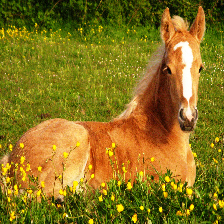

In [62]:
img

In [64]:
img_arr = img_to_array(img)

In [65]:
img_arr.shape

(224, 224, 3)

In [66]:
model.predict(img_arr.reshape(1,224,224,3))

array([[1.]], dtype=float32)

In [67]:
model.predict(img_arr.reshape(1,224,224,3)).round(3)

array([[1.]], dtype=float32)

In [68]:
class_name = ['horses','humans']

In [69]:
np.argmax(model.predict(img_arr.reshape(1,224,224,3)))

0

In [70]:
class_name[np.argmax(model.predict(img_arr.reshape(1,224,224,3)))]

'horses'